# 1. Database-style DataFrame Merges

Merge operations combine DataFrames on common columns or indices.



In [1]:
# Import pandas as pd
import pandas as pd
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Run this code
data_1 = pd.DataFrame({'key':['A','B','C','B','E','F','A','H','A','J'],
                      'values_1': range(10)})
print(data_1)

  key  values_1
0   A         0
1   B         1
2   C         2
3   B         3
4   E         4
5   F         5
6   A         6
7   H         7
8   A         8
9   J         9


In [3]:
# Run this code
data_2 = pd.DataFrame({'key':['A','B','C'],
                       'values_2':range(3)})
print(data_2)

  key  values_2
0   A         0
1   B         1
2   C         2


Our first DataFrame `data_1` has multiple rows with keys 'A' and 'B', whereas DataFrame `data_2` has only 1 row for each value in the `key` column. This is an example of `many-to-one` $^{1}$ merge situation.

By merging these 2 dataframes we obtain following result:

In [6]:
# Merge data_1 and data_2
pd.merge(data_1, data_2)

,key,values_1,values_2
0,A,0,0
1,A,6,0
2,A,8,0
3,B,1,1
4,B,3,1
5,C,2,2


Our DataFrames have the same column `key ` and in this case `.merge()` uses the overlapping column named as `keys` to join on. However it is a good practice to specify explicitly the `key` column like this:

In [7]:
# Merge data_1 and data_2, specify key column
pd.merge(data_1, data_2, on = 'key')

,key,values_1,values_2
0,A,0,0
1,A,6,0
2,A,8,0
3,B,1,1
4,B,3,1
5,C,2,2


As you can notice 'E', 'F', 'H', 'J'  and associated data are missing from the result. It is because `merge()` acts with 'inner' merge (join) by default. However, we can explicitly specify it using `how = 'inner'`

**inner join** (or inner merge) keeps only those values that have a common key in both DataFrames, in our case 'A', 'B' and 'C'. 


Other possible options are:
 
- **left join** (left outer join)

We specify `how = 'left'`: it keeps each row from the left DataFrame and only those from the right DataFrame that match. Non-matching values are replaced with NaNs.


- **right join** (right outer join)

We specify `how = 'right'`: it is the opposite of left join. Non-matching values are filled with NaNs as well.

- **outer** (full outer join)

We specify `how = 'outer'`: it takes the union of the keys and applies both left and right join

Run the following code to see these merging strategies $^{2}$.

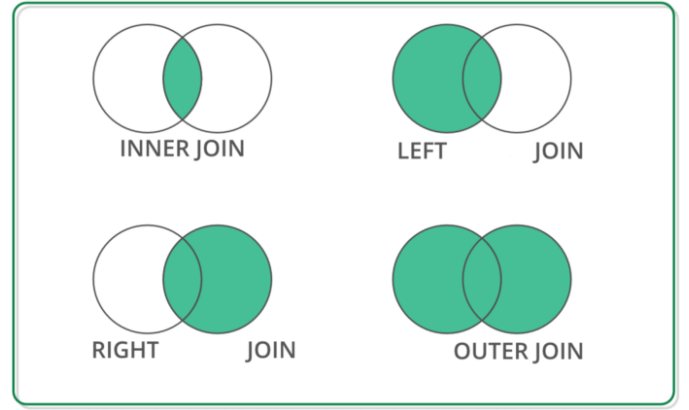

In [8]:
# Run this to print merging strategies
Image(filename='Images/merging.png')

In [9]:
# Merge the DataFrames data_1 and data_2 with left join
pd.merge(data_1, data_2, on = 'key', how = 'left')

,key,values_1,values_2
0,A,0,0.0
1,B,1,1.0
2,C,2,2.0
3,B,3,1.0
4,E,4,NaN
5,F,5,NaN
6,A,6,0.0
7,H,7,NaN
8,A,8,0.0
9,J,9,NaN


In [10]:
# TASK 1 >>>> Merge the dataframes data_1 and data_2 on 'key', specify right join
pd.merge(data_1, data_2, on = 'key', how = 'right')

,key,values_1,values_2
0,A,0,0
1,A,6,0
2,A,8,0
3,B,1,1
4,B,3,1
5,C,2,2


In [11]:
# TASK 2 >>>> Merge the dataframes data_1 and data_2 on 'key', specify full outer join
pd.merge(data_1, data_2, on = 'key', how = 'outer')

,key,values_1,values_2
0,A,0,0.0
1,A,6,0.0
2,A,8,0.0
3,B,1,1.0
4,B,3,1.0
5,C,2,2.0
6,E,4,NaN
7,F,5,NaN
8,H,7,NaN
9,J,9,NaN


If the key column names are different in each DataFrame object, we can specify them separately.

- for the left DataFrame: `left_on`
- for the right DataFrame: `right_on`

In [12]:
# Run this code
data_3 = pd.DataFrame({'key_left': ['E','F','G','H','I','J'],
                       'values': range(6)})
print(data_3)

  key_left  values
0        E       0
1        F       1
2        G       2
3        H       3
4        I       4
5        J       5


In [13]:
# Run this code
data_4 = pd.DataFrame({'key_right': ['D','E','F','G'],
                       'values_2': range(4)})
print(data_4)

  key_right  values_2
0         D         0
1         E         1
2         F         2
3         G         3


In [14]:
# Merge the DataFrames data_3 and data_4, specify left and right keys to join on
# Specify inner join 
pd.merge(data_3, data_4, left_on= 'key_left', right_on= 'key_right', how = 'inner')

,key_left,values,key_right,values_2
0,E,0,E,1
1,F,1,F,2
2,G,2,G,3


In [15]:
# Run this code
df_1 = pd.DataFrame({'key': ['red','black','yellow','green','black','pink','white','black'],
                     'values': range(8)})
print(df_1)

      key  values
0     red       0
1   black       1
2  yellow       2
3   green       3
4   black       4
5    pink       5
6   white       6
7   black       7


In [16]:
# Run this code
df_2 = pd.DataFrame({'key': ['white','pink','gray','yellow','black','black','black'],
                     'values': range(7)})
print(df_2)

      key  values
0   white       0
1    pink       1
2    gray       2
3  yellow       3
4   black       4
5   black       5
6   black       6


In [17]:
# Merge df_1 and df_2 on 'key', specify left join
pd.merge(df_1, df_2, on = 'key', how = 'left')

,key,values_x,values_y
0,red,0,NaN
1,black,1,4.0
2,black,1,5.0
3,black,1,6.0
4,yellow,2,3.0
5,green,3,NaN
6,black,4,4.0
7,black,4,5.0
8,black,4,6.0
9,pink,5,1.0


This is _many-to-many_ $^{1}$ join situation which creates **Cartesian product** of the rows. In the result we can see we have 9 'black' rows. It is because there are 3 'black' rows in the left DataFrame `df_1` and 3 'black' rows in the right DataFrame `df_2`, so in the result we have every combination of rows where the key is equal to 'black'.

As you can see `merge()` automatically renames the columns as 'values_x' and 'values_y' to distinguish where the values belong to. We can explicitly specify these column's names with the 'suffixes' option. We only need to pass the desired names into the list like this: `suffixes=['_from_df1', '_from_df2']`.

In [18]:
# Merge df_1 and df_2 on 'key', specify left join
# Set parameter suffixes=[]
pd.merge(df_1, df_2, on = 'key', how = 'left', suffixes=['_from_df1', '_from_df2'])

,key,values_from_df1,values_from_df2
0,red,0,NaN
1,black,1,4.0
2,black,1,5.0
3,black,1,6.0
4,yellow,2,3.0
5,green,3,NaN
6,black,4,4.0
7,black,4,5.0
8,black,4,6.0
9,pink,5,1.0


- if we want to merge with multiple keys we have to pass a list of columns names:


In [19]:
# Run this code
df_3 = pd.DataFrame({'key_1':['apple','banana','coconut','pineapple','strawberry'],
                     'key_2':['yes','maybe','maybe','yes','no'],
                     'values_1': range(5)})
print(df_3)

        key_1  key_2  values_1
0       apple    yes         0
1      banana  maybe         1
2     coconut  maybe         2
3   pineapple    yes         3
4  strawberry     no         4


In [20]:
# Run this code
df_4 = pd.DataFrame({'key_1':['apple','banana','coconut','strawberry','strawberry'],
                     'key_2':['no','maybe','yes','no','no'],
                     'values_1': range(5)})
print(df_4)

        key_1  key_2  values_1
0       apple     no         0
1      banana  maybe         1
2     coconut    yes         2
3  strawberry     no         3
4  strawberry     no         4


In [21]:
# Merge DataFrames df_3 and df_4 on column keys 'key_1' and 'key_2' passed within the list and specify inner join
pd.merge(df_3, df_4, on = ['key_1', 'key_2'], how = 'inner')

,key_1,key_2,values_1_x,values_1_y
0,banana,maybe,1,1
1,strawberry,no,4,3
2,strawberry,no,4,4


# 2. Advanced and Alternative Methods (READ-AND-PLAY)
If you are familiar and fine with using the merge method, you should be good to go. You might however stumble also upon some alternative, sometimes more complex methods, for doing similar things. Let's read through those.

## 2.1 Merging DataFrames on the Index

Our key(s) columns for merging can be found in a DataFrame as an index. In this case we can use the parameters `left_index = True` or `right_index = True` (or both) to indicate that the index should be used as the merge key.

- `left_index` : bool (default False)
   - if True will choose index from left DataFrame as join key
- `right_index` : bool (default False)
   - if True will choose index from right DataFrame as join key

In [22]:
# Run this code
students = [(1, 'Robert', 30, 'Slovakia', 26),
           (2, 'Jana', 29, 'Sweden' , 27),
           (3, 'Martin', 31, 'Sweden', 26),
           (4, 'Kristina', 26,'Germany' , 30),
           (5, 'Peter', 33, 'Austria' , 22),
           (6, 'Nikola', 25, 'USA', 23),
           (7, 'Renato', 35, 'Brazil', 26)]

students_1 = pd.DataFrame(students, columns= ['student_id', 'first_name', 'age', 'city', 'score'])
students_1.set_index('student_id', inplace = True)
print(students_1)

           first_name  age      city  score
student_id                                 
1              Robert   30  Slovakia     26
2                Jana   29    Sweden     27
3              Martin   31    Sweden     26
4            Kristina   26   Germany     30
5               Peter   33   Austria     22
6              Nikola   25       USA     23
7              Andrej   25       USA     26


In [23]:
# Run this code
programs = [(1, 'Data Science', 3),
            (2, 'Data Analyst', 1),
            (3, 'Microbiology', 4),
            (4, 'Art History', 2),
            (5, 'Chemistry', 5),
            (6, 'Economics', 4),
            (7, 'Digital Humanities', 2)]

programs_1 = pd.DataFrame(programs, columns= ['student_id', 'study_program', 'grade'])
programs_1.set_index('student_id', inplace = True)
print(programs_1)

                 study_program  grade
student_id                           
1                 Data Science      3
2                 Data Analyst      1
3                 Microbiology      4
4                  Art History      2
5                    Chemistry      5
6                    Economics      4
7           Digital Humanities      2


As you can see, DataFrames `students_1` and `programs` share the same column 'student_id' that is set as an index.

In [24]:
# Merge students_1 and programs on 'student_id' by passing `left_index = True` and `right_index = True`

merged_df = pd.merge(students_1, programs_1, how = 'inner', left_index = True, right_index = True)
print(merged_df)

           first_name  age      city  score       study_program  grade
student_id                                                            
1              Robert   30  Slovakia     26        Data Science      3
2                Jana   29    Sweden     27        Data Analyst      1
3              Martin   31    Sweden     26        Microbiology      4
4            Kristina   26   Germany     30         Art History      2
5               Peter   33   Austria     22           Chemistry      5
6              Nikola   25       USA     23           Economics      4
7              Andrej   25       USA     26  Digital Humanities      2


## 2.2 Pandas `.join()`

- it is an object method function - it means that it enables us to specify only 1 DataFrame to be joined to the DataFrame from which you call `.join()` on
- by default it performs left join
- by default it **joins on indices**

In [25]:
# Join students_1 and programs_1 
joined_df = students_1.join(programs_1)
print(joined_df)

           first_name  age      city  score       study_program  grade
student_id                                                            
1              Robert   30  Slovakia     26        Data Science      3
2                Jana   29    Sweden     27        Data Analyst      1
3              Martin   31    Sweden     26        Microbiology      4
4            Kristina   26   Germany     30         Art History      2
5               Peter   33   Austria     22           Chemistry      5
6              Nikola   25       USA     23           Economics      4
7              Andrej   25       USA     26  Digital Humanities      2


In [26]:
# Run this code, please
programs_1.reset_index(inplace = True)
students_1.reset_index(inplace = True)

If we want to join DataFrames that have overlapping column keys, we need to specify the parameters `lsuffix` and `rsuffix`.

In [27]:
# Join students_1 and programs_1
# Specify suffixes for both DataFrames
joined_df = students_1.join(programs_1, lsuffix = '_left', rsuffix = '_right')
print(joined_df)

   student_id_left first_name  age      city  score  student_id_right  \
0                1     Robert   30  Slovakia     26                 1   
1                2       Jana   29    Sweden     27                 2   
2                3     Martin   31    Sweden     26                 3   
3                4   Kristina   26   Germany     30                 4   
4                5      Peter   33   Austria     22                 5   
5                6     Nikola   25       USA     23                 6   
6                7     Andrej   25       USA     26                 7   

        study_program  grade  
0        Data Science      3  
1        Data Analyst      1  
2        Microbiology      4  
3         Art History      2  
4           Chemistry      5  
5           Economics      4  
6  Digital Humanities      2  


# 2.3 Pandas `.concat()`

-concatenate function combines DataFrames across rows or columns 
- by default performs outer join, but we can specify inner join by setting `join = 'inner'`

- by default works along `axis = 0` (rows)

`pd.concat([df1, df2])`

- we can pass `axis = 1` to concatenate along columns 

`pd.concat([df1, df2], axis = 1)`

In [28]:
# Concatenate students_1 and programs_11 along the rows
concat_by_rows = pd.concat([students_1, programs_1])
print(concat_by_rows)

   student_id first_name   age      city  score       study_program  grade
0           1     Robert  30.0  Slovakia   26.0                 NaN    NaN
1           2       Jana  29.0    Sweden   27.0                 NaN    NaN
2           3     Martin  31.0    Sweden   26.0                 NaN    NaN
3           4   Kristina  26.0   Germany   30.0                 NaN    NaN
4           5      Peter  33.0   Austria   22.0                 NaN    NaN
5           6     Nikola  25.0       USA   23.0                 NaN    NaN
6           7     Andrej  25.0       USA   26.0                 NaN    NaN
0           1        NaN   NaN       NaN    NaN        Data Science    3.0
1           2        NaN   NaN       NaN    NaN        Data Analyst    1.0
2           3        NaN   NaN       NaN    NaN        Microbiology    4.0
3           4        NaN   NaN       NaN    NaN         Art History    2.0
4           5        NaN   NaN       NaN    NaN           Chemistry    5.0
5           6        NaN 

Column names in DataFrames `students_1` and `programs_1` are not the same. As we can see in the exapmle above, by default, those columns have been also added on the result and NaN values have been filled in.

We can also create a hierarchical index on the concatenation axis, when we use argument `keys = ['key1','key2','key3','key_n'...]`.



In [29]:
# Concatenate the DataFrames programs_1 and students_1 along the rows
# Set keys argument on columns 'student_id' and 'study_program'
conc = pd.concat([programs_1, students_1], keys = ['student_id','study_program'] )
print(conc)

                 student_id       study_program  grade first_name   age  \
student_id    0           1        Data Science    3.0        NaN   NaN   
              1           2        Data Analyst    1.0        NaN   NaN   
              2           3        Microbiology    4.0        NaN   NaN   
              3           4         Art History    2.0        NaN   NaN   
              4           5           Chemistry    5.0        NaN   NaN   
              5           6           Economics    4.0        NaN   NaN   
              6           7  Digital Humanities    2.0        NaN   NaN   
study_program 0           1                 NaN    NaN     Robert  30.0   
              1           2                 NaN    NaN       Jana  29.0   
              2           3                 NaN    NaN     Martin  31.0   
              3           4                 NaN    NaN   Kristina  26.0   
              4           5                 NaN    NaN      Peter  33.0   
              5          

In [30]:
# Concatenate df_3 and df_4 along the rows
concat_df = pd.concat([df_3, df_4])
print(concat_df)

        key_1  key_2  values_1
0       apple    yes         0
1      banana  maybe         1
2     coconut  maybe         2
3   pineapple    yes         3
4  strawberry     no         4
0       apple     no         0
1      banana  maybe         1
2     coconut    yes         2
3  strawberry     no         3
4  strawberry     no         4


DataFrames `df_3` and `df_4` have the same column names 'key_1' and 'key_2'. Therefore the indices are repeating when tha DataFrames are stacked. If you want to have 0-based index, you'll need to set parameter `ignore_index = True` within `.concat()` function.

In [31]:
# Concatenate df_3 and df_4 along the rows
# Set the parameter `ignore_index = True`
concat_df_2 = pd.concat([df_3, df_4], ignore_index = True)
print(concat_df_2)

        key_1  key_2  values_1
0       apple    yes         0
1      banana  maybe         1
2     coconut  maybe         2
3   pineapple    yes         3
4  strawberry     no         4
5       apple     no         0
6      banana  maybe         1
7     coconut    yes         2
8  strawberry     no         3
9  strawberry     no         4


In [32]:
# Concatenate students_1 and programs_11 along the columns
concat_by_columns = pd.concat([students_1, programs_1], axis = 1)
print(concat_by_columns)

   student_id first_name  age      city  score  student_id  \
0           1     Robert   30  Slovakia     26           1   
1           2       Jana   29    Sweden     27           2   
2           3     Martin   31    Sweden     26           3   
3           4   Kristina   26   Germany     30           4   
4           5      Peter   33   Austria     22           5   
5           6     Nikola   25       USA     23           6   
6           7     Andrej   25       USA     26           7   

        study_program  grade  
0        Data Science      3  
1        Data Analyst      1  
2        Microbiology      4  
3         Art History      2  
4           Chemistry      5  
5           Economics      4  
6  Digital Humanities      2  


## 2.4 Pandas `.append()`

  

- this method is a shortcut to `.concat()`
- it is used to add elements to the existing objects

In [33]:
# Call .append() method on students_1 and pass programs_1 as an argument within the method
appended_df = students_1.append(programs_1)
print(appended_df)

   student_id first_name   age      city  score       study_program  grade
0           1     Robert  30.0  Slovakia   26.0                 NaN    NaN
1           2       Jana  29.0    Sweden   27.0                 NaN    NaN
2           3     Martin  31.0    Sweden   26.0                 NaN    NaN
3           4   Kristina  26.0   Germany   30.0                 NaN    NaN
4           5      Peter  33.0   Austria   22.0                 NaN    NaN
5           6     Nikola  25.0       USA   23.0                 NaN    NaN
6           7     Andrej  25.0       USA   26.0                 NaN    NaN
0           1        NaN   NaN       NaN    NaN        Data Science    3.0
1           2        NaN   NaN       NaN    NaN        Data Analyst    1.0
2           3        NaN   NaN       NaN    NaN        Microbiology    4.0
3           4        NaN   NaN       NaN    NaN         Art History    2.0
4           5        NaN   NaN       NaN    NaN           Chemistry    5.0
5           6        NaN 

We can append new rows to our existing DataFrames as well. We simply create a new Series (or a dictionary) with items and associated indices (column name) and append it to an existing DataFrame using the `.append()` method. New row can be appended only if the `ignore_index = True` argument is set within the method.

In [34]:
# Run this code 
# It will create new_row which we'll append to the students_1 
new_row = pd.Series([8, 'Renata', 37, 'Czech Republic', 22],
                    index = ['student_id', 'first_name', 'age', 'city', 'score'])

In [35]:
# Append new_row Series to the students_1 DataFrame 
# Set argument 'ignore_index = True'
students_1 = students_1.append(new_row, ignore_index = True)
print(students_1)

   student_id first_name  age            city  score
0           1     Robert   30        Slovakia     26
1           2       Jana   29          Sweden     27
2           3     Martin   31          Sweden     26
3           4   Kristina   26         Germany     30
4           5      Peter   33         Austria     22
5           6     Nikola   25             USA     23
6           7     Andrej   25             USA     26
7           8     Renata   37  Czech Republic     22


We can use `.append()` method to add both a single element or a list to an existing list.

In [36]:
# Run this code
list_1 = ['Today', 'is', 'a', 'good']

In [37]:
# Append word 'day' to list_1
list_1.append('day')
print(list_1)

['Today', 'is', 'a', 'good', 'day']


In [38]:
# Run this code
new_list = [10,20,30,40,50]

In [39]:
# Append new_list to list_1 
list_1.append(new_list)
print(list_1)

['Today', 'is', 'a', 'good', 'day', [10, 20, 30, 40, 50]]


# 3. References

$^{1}$ Wes Mckinney (2013). Python for Data Analysis. (First ed.). California: O'Reilly Media, Inc.

$^{2}$ Medium. Merging DataFrames with pandas. [ONLINE] Available at: https://medium.com/swlh/merging-dataframes-with-pandas-pd-merge-7764c7e2d46d. [Accessed 14 September 2020].

Material adapted for RBI internal purposes with full permissions from original authors. Source: https://github.com/zatkopatrik/authentic-data-science